In [2]:
import pickle
import pandas as pd

import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
StarWars = pd.read_pickle("StarWars_Gesamt.pckl")
StarWars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28598 entries, 0 to 28597
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   film_id                  28598 non-null  object        
 1   titel                    28598 non-null  object        
 2   jahr                     28598 non-null  object        
 3   kategorie                28598 non-null  object        
 4   review_id                28598 non-null  object        
 5   username                 28598 non-null  object        
 6   gesamtbewertung          28598 non-null  float64       
 7   rating                   28598 non-null  float64       
 8   date                     28598 non-null  datetime64[ns]
 9   review_caption           28598 non-null  object        
 10  bewertung                28598 non-null  object        
 11  textblob_polaritaet      28598 non-null  float64       
 12  textblob_subjektivitaet  28598 n

In [4]:
#StarWars.titel.value_counts()

## Normalisation

In [5]:
normalized = StarWars.loc[:,['titel','rating', 'textblob_polaritaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos']]

def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = ((column - min_val) / (max_val - min_val)) * 10
    return normalized_column

normalized['normalized_textblob'] = min_max_normalize(normalized['textblob_polaritaet'])

normalized['normalized_vader_compound'] = min_max_normalize(normalized['vader_compound'])

normalized['normalized_roberta_neg'] = min_max_normalize(normalized['roberta_neg'])
normalized['normalized_roberta_neu'] = min_max_normalize(normalized['roberta_neu'])
normalized['normalized_roberta_pos'] = min_max_normalize(normalized['roberta_pos'])


normalized.groupby('titel')[['normalized_textblob','normalized_vader_compound','normalized_roberta_neg','normalized_roberta_neu','normalized_roberta_pos']].mean().head()


,normalized_textblob,normalized_vader_compound,normalized_roberta_neg,normalized_roberta_neu,normalized_roberta_pos
titel,,,,,
Solo: A Star Wars Story,5.939463,7.242176,2.492944,1.970566,5.713671
Star Wars Rebels,5.873374,5.982687,3.004743,2.068505,5.121672
Star Wars: Clone Wars,6.085664,6.811480,1.910363,2.373105,5.901416
Star Wars: Episode I - Die dunkle Bedrohung,5.747623,6.594919,3.218916,2.253858,4.737405
Star Wars: Episode II - Angriff der Klonkrieger,5.725334,6.794548,3.232499,2.130571,4.840748


In [6]:
normalized

,titel,rating,textblob_polaritaet,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,normalized_textblob,normalized_vader_compound,normalized_roberta_neg,normalized_roberta_neu,normalized_roberta_pos
0,Star Wars: Ewoks - Kampf um Endor,2.0,-0.005000,0.092,0.848,0.060,-0.4964,0.613927,0.311481,0.074592,4.975000,2.517003,6.351577,3.275942,0.714178
1,Star Wars: Ewoks - Kampf um Endor,7.0,0.065385,0.086,0.754,0.161,0.8809,0.025831,0.138740,0.835430,5.326923,9.404881,0.251485,1.427339,8.414461
2,Star Wars: Ewoks - Kampf um Endor,5.0,0.148846,0.139,0.698,0.163,0.5923,0.676146,0.277843,0.046011,5.744229,7.961592,6.996945,2.915960,0.424922
3,Star Wars: Ewoks - Kampf um Endor,5.0,0.123972,0.046,0.799,0.156,0.9897,0.569818,0.384397,0.045785,5.619858,9.948990,5.894047,4.056257,0.422635
4,Star Wars: Ewoks - Kampf um Endor,7.0,0.262500,0.099,0.652,0.249,0.9890,0.136534,0.421554,0.441912,6.312500,9.945489,1.399769,4.453894,4.431753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593,The Star Wars Holiday Special,1.0,-0.159774,0.209,0.616,0.175,-0.8979,0.827697,0.138945,0.033358,4.201128,0.509102,8.568922,1.429532,0.296864
28594,The Star Wars Holiday Special,10.0,0.039538,0.143,0.766,0.091,-0.9042,0.031920,0.164780,0.803300,5.197691,0.477596,0.314650,1.706013,8.089279
28595,The Star Wars Holiday Special,1.0,0.063523,0.108,0.790,0.102,-0.6891,0.759251,0.213284,0.027465,5.317613,1.553311,7.858963,2.225080,0.237216
28596,The Star Wars Holiday Special,10.0,0.063095,0.136,0.770,0.094,-0.7083,0.405111,0.390556,0.204334,5.315476,1.457291,4.185606,4.122168,2.027267


In [7]:
StarWars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28598 entries, 0 to 28597
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   film_id                  28598 non-null  object        
 1   titel                    28598 non-null  object        
 2   jahr                     28598 non-null  object        
 3   kategorie                28598 non-null  object        
 4   review_id                28598 non-null  object        
 5   username                 28598 non-null  object        
 6   gesamtbewertung          28598 non-null  float64       
 7   rating                   28598 non-null  float64       
 8   date                     28598 non-null  datetime64[ns]
 9   review_caption           28598 non-null  object        
 10  bewertung                28598 non-null  object        
 11  textblob_polaritaet      28598 non-null  float64       
 12  textblob_subjektivitaet  28598 n

## Analyse Filme & Ratings

In [8]:
anzahl_kat = StarWars.kategorie.value_counts()

fig = px.bar(StarWars.groupby('kategorie')['rating'].mean().reset_index(),
             x='kategorie',
             y= anzahl_kat.values,
             color='rating',
             color_continuous_scale='Reds')

fig.update_yaxes(title_text='Anzahl Ratings für Filmkategorie')
fig.update_layout(title='Durchschnittliches Rating für Filmkategorie', font=dict(size=16),
                  title_x=0.5,
                  title_y=0.95,
                  xaxis=dict(tickfont=dict(family='Arial', size=14)),  # Set x-axis tick font properties
                  yaxis=dict(tickfont=dict(family='Arial', size=12)),
                  plot_bgcolor='rgba(0,0,0,0)'  # Set the plot background color to transparent
                  )

fig.show()


### Beispiele für Tabelle mit verschiedenen Ratings

In [9]:
beispiel_rows = ["rw8027959","rw7757717","rw8088475"]
beispiel_df = StarWars.loc[StarWars['review_id'].isin(beispiel_rows)]
beispiel_df = beispiel_df.loc[:, ['review_caption','rating','bewertung','textblob_polaritaet','vader_compound','roberta_neg','roberta_neu','roberta_pos']]
beispiel_df


,review_caption,rating,bewertung,textblob_polaritaet,vader_compound,roberta_neg,roberta_neu,roberta_pos
130,Could have been an exciting story.,5.0,This could have been an exciting story given t...,0.001825,-0.9901,0.109258,0.447362,0.443380
135,worthless money made,1.0,This movie is along the lines of force awakens...,-0.214286,-0.8626,0.943084,0.049416,0.007499
142,Rogue One is a prequel to A New Hope that tell...,10.0,Rogue One is an all-new epic adventure directe...,0.232193,0.9873,0.017051,0.436711,0.546238


In [10]:
# StarWars_titel = StarWars.loc[StarWars['titel'] == "Star Wars: Episode IX - Der Aufstieg Skywalkers"]

# random_rows = pd.DataFrame(columns =StarWars.columns)
# versch_ratings = [9, 5, 1]
# for rating in versch_ratings:
#     filtered_StarWars_titel = StarWars_titel[StarWars_titel['rating'] == rating]
#     random_row = filtered_StarWars_titel.sample(n=1)
#     random_rows = pd.concat([random_rows, random_row], ignore_index=True)
    
#     #random_rows = random_rows.append(random_row)
#     #random_rows.loc[len(random_rows)] = random_row

# print(type(random_rows))
# pd.set_option('display.max_colwidth', None)
# random_rows = random_rows.loc[:, ['review_caption','rating','bewertung','textblob_polaritaet','vader_compound','roberta_neg','roberta_neu','roberta_pos']]
# random_rows

In [11]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# def tokenize_bewertung(text):
#     try:
#         return nltk.word_tokenize(text)
#     except TypeError:
#         return []

# def entferne_stoppwörter(tokens):
#     stopp_wörter = set(stopwords.words('english'))
#     gefilterte_tokens = [token for token in tokens if token.lower() not in stopp_wörter]
#     return gefilterte_tokens

# random_rows['bewertung_tokenized'] = random_rows['bewertung'].apply(tokenize_bewertung, entferne_stoppwörter)

# random_rows

## Korrelation

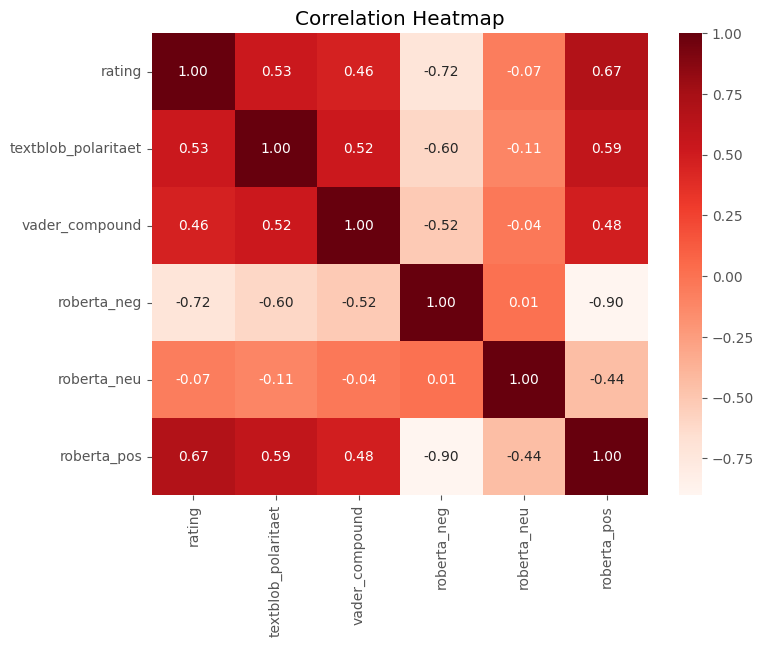

In [12]:
#correlation_matrix = StarWars[['rating', 'textblob_polaritaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos']].corr()
correlation_matrix = StarWars[['rating', 'textblob_polaritaet','vader_compound','roberta_neg','roberta_neu','roberta_pos']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#### Korrelation Vader zu Rating

In [174]:
#Korrelation Vader zu Rating
corr_vader_rating_nach_titel = StarWars.loc[:, ['titel','rating','vader_compound']]
corr_vader_rating_nach_titel = corr_vader_rating_nach_titel.groupby('titel')[['rating','vader_compound']].corr()

#selektiere nur jede Zweite Zeile in der Korrelation vorhanden ist (vermeiden der Korrelationsmatrizzen)
corr_vader_rating_nach_titel = corr_vader_rating_nach_titel.iloc[::2][['vader_compound']].reset_index().drop(columns=['level_1'])
#Nach absteigendem Vader / Rating Korrelation sortieren
corr_vader_rating_nach_titel = corr_vader_rating_nach_titel.sort_values(by=['vader_compound'], ascending=False)
corr_vader_rating_nach_titel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 14
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titel           21 non-null     object 
 1   vader_compound  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [175]:
#Berechnun der wirklichen Gesamtbewertung als rating
df_gesamtbewertung = pd.DataFrame(StarWars.groupby('titel')['rating'].mean()).reset_index()

#Berechnung Anzahl Rezessionen je Film
anzahl_rez_titel = StarWars['titel'].value_counts().to_frame().reset_index()

to_merge_df = StarWars[['titel','jahr','gesamtbewertung']].drop_duplicates()
corr_vader_rating_nach_titel = pd.merge(corr_vader_rating_nach_titel, to_merge_df, on = 'titel', how = 'left')
corr_vader_rating_nach_titel = pd.merge(corr_vader_rating_nach_titel, df_gesamtbewertung, on='titel', how = 'left')
corr_vader_rating_nach_titel = pd.merge(corr_vader_rating_nach_titel, anzahl_rez_titel, on='titel', how = 'left')

#Entfernen des fälschlicherweise reingekommen doppelten Wertes "Star Wars: CLone Wars"
corr_vader_rating_nach_titel.drop(8, inplace=True)



corr_vader_rating_nach_titel

,titel,vader_compound,jahr,gesamtbewertung,rating,count
0,Star Wars Rebels,0.533168,2014,8.1,6.872727,165
1,Star Wars: Clone Wars,0.525000,2003,7.8,7.588235,51
2,Star Wars: Episode VII - Das Erwachen der Macht,0.520218,2015,7.8,6.133524,2449
3,Star Wars: Ewoks - Kampf um Endor,0.498807,1985,5.4,5.950000,40
4,Star Wars: Episode IX - Der Aufstieg Skywalkers,0.487842,2019,6.4,5.944756,6064
5,Star Wars: Episode VIII - Die letzten Jedi,0.479174,2017,6.9,4.108159,4253
6,Star Wars: Resistance,0.476190,2018,5.3,4.449102,167
7,Star Wars: The Clone Wars,0.459598,2008,5.9,7.518164,523
9,Solo: A Star Wars Story,0.403383,2018,6.9,7.187266,2136
10,The Star Wars Holiday Special,0.399123,1978,2.2,3.452830,212


#### Einfügen Daten für Textblob

In [176]:
#Korrelation Vader zu Rating
corr_textblob_rating_nach_titel = StarWars.loc[:, ['titel','rating','textblob_polaritaet']]
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.groupby('titel')[['rating','textblob_polaritaet']].corr()

#selektiere nur jede Zweite Zeile in der Korrelation vorhanden ist (vermeiden der Korrelationsmatrizzen)
corr_textblob_rating_nach_titel= corr_textblob_rating_nach_titel.iloc[::2][['textblob_polaritaet']].reset_index().drop(columns=['level_1'])
#Nach absteigendem Vader / Rating Korrelation sortieren
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.sort_values(by=['textblob_polaritaet'], ascending=False)

corr_nach_titel = pd.merge(corr_vader_rating_nach_titel, corr_textblob_rating_nach_titel, how = 'left', on ='titel')
corr_nach_titel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titel                21 non-null     object 
 1   vader_compound       21 non-null     float64
 2   jahr                 21 non-null     object 
 3   gesamtbewertung      21 non-null     float64
 4   rating               21 non-null     float64
 5   count                21 non-null     int64  
 6   textblob_polaritaet  21 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ KB


#### Grouped Bar Chart mit dritter Dimension (Anzahl Bewertung)

In [224]:
red_colors = px.colors.sequential.Reds[::-1]

fig = px.bar(corr_nach_titel,
             x='titel',
             y='vader_compound',
             color='count',  
             barmode='group',
             color_continuous_scale=red_colors,
             labels={'count': 'Count', 'vader_compound': 'Vader Compound'},
             title='Korrelation nach Film für Vader (Links) & Textblob (Rechts)',
             width=1400, 
             height=600)

fig.add_bar(x=corr_nach_titel['titel'],
            y=corr_nach_titel['textblob_polaritaet'], 
            marker_color=corr_nach_titel['count'], 
            marker_colorscale=red_colors,
            name='TextBlob Polarity')

fig.update_layout(
    barmode='group',
    plot_bgcolor='rgba(0,0,0,0)',  
    xaxis_title='Titel',
    yaxis_title='Korrelation',
    title_font_size=30,
    title_x=0.5,
    xaxis=dict(title_font=dict(size=18)),
    yaxis=dict(title_font=dict(size=18)),
    showlegend=False
)

fig.show()


#### Korrelation Textblob zu Rating

In [171]:
#Korrelation Vader zu Rating
corr_textblob_rating_nach_titel = StarWars.loc[:, ['titel','rating','textblob_polaritaet']]
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.groupby('titel')[['rating','textblob_polaritaet']].corr()

#selektiere nur jede Zweite Zeile in der Korrelation vorhanden ist (vermeiden der Korrelationsmatrizzen)
corr_textblob_rating_nach_titel= corr_textblob_rating_nach_titel.iloc[::2][['textblob_polaritaet']].reset_index().drop(columns=['level_1'])
#Nach absteigendem Vader / Rating Korrelation sortieren
corr_textblob_rating_nach_titel = corr_textblob_rating_nach_titel.sort_values(by=['textblob_polaritaet'], ascending=False)


corr_textblob_rating_nach_titel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 10 to 8
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titel                21 non-null     object 
 1   textblob_polaritaet  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [172]:
# #Berechnun der wirklichen Gesamtbewertung als rating
# df_gesamtbewertung = pd.DataFrame(StarWars.groupby('titel')['rating'].mean()).reset_index()

# #Berechnung Anzahl Rezessionen je Film
# anzahl_rez_titel = StarWars['titel'].value_counts().to_frame().reset_index()

#to_merge_df = StarWars[['titel','jahr','gesamtbewertung']].drop_duplicates()


corr_textblob_rating_nach_titel = pd.merge(corr_textblob_rating_nach_titel, to_merge_df, on = 'titel', how = 'left')
corr_textblob_rating_nach_titel = pd.merge(corr_textblob_rating_nach_titel, df_gesamtbewertung, on='titel', how = 'left')
corr_textblob_rating_nach_titel = pd.merge(corr_textblob_rating_nach_titel, anzahl_rez_titel, on='titel', how = 'left')

corr_textblob_rating_nach_titel.drop(8, inplace=True)



corr_textblob_rating_nach_titel

,titel,textblob_polaritaet,jahr,gesamtbewertung,rating,count
0,Star Wars: Episode VII - Das Erwachen der Macht,0.562927,2015,7.8,6.133524,2449
1,Star Wars: Ewoks - Karawane der Tapferen,0.556746,1984,5.3,6.783784,37
2,Star Wars: Ewoks - Kampf um Endor,0.554557,1985,5.4,5.950000,40
3,Star Wars Rebels,0.537448,2014,8.1,6.872727,165
4,Star Wars: Clone Wars,0.530051,2003,7.8,7.588235,51
5,Star Wars: Episode II - Angriff der Klonkrieger,0.526316,2002,6.6,6.653438,2545
6,Star Wars: Rogue One,0.515025,2016,7.8,7.370518,1255
7,Star Wars: Episode IX - Der Aufstieg Skywalkers,0.514020,2019,6.4,5.944756,6064
9,Star Wars: The Clone Wars,0.511076,2008,8.4,7.518164,523
10,Star Wars: Resistance,0.501144,2018,5.3,4.449102,167


In [173]:
#Korrelation Vader / Rating nach Titel



red_colors = px.colors.sequential.Reds[::-1]
# Create the bar plot using Plotly Express
fig = px.bar(corr_textblob_rating_nach_titel.sort_values(by=['textblob_polaritaet'], ascending=False), 
             x=corr_textblob_rating_nach_titel['titel'],  # x-axis values are the index of the Series
             y=corr_textblob_rating_nach_titel['textblob_polaritaet'],  # y-axis values are the values of the Series
             #color_discrete_sequence =[(0,"blue"), (1,"red")] ,  # Color scale for the bars
             color = 'count',
            color_continuous_scale=red_colors,
             labels={'x': 'Titel', 'y': 'Korrelation'},  # Set x and y axis labels
             title='Korrelation Textblob Polarität zu Rating',  # Set title
             width=1200, height=600)  # Set figure size

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # No background color
    xaxis_title='Titel',
    yaxis_title='Korrelation',
    title_font_size=30,
    title_x = 0.5,
    xaxis=dict(title_font=dict(size=18)),
    yaxis=dict(title_font=dict(size=18))
)

# Show plot
fig.show()


## Deskriptve Statistik

In [ ]:
list_of_columns = ['rating', 'textblob_polaritaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos']

df_nach_titel = StarWars.groupby('titel')[list_of_columns].mean().reset_index()

df_nach_titel.loc[:, 'rating':'roberta_pos'] = df_nach_titel.loc[:, 'rating':'roberta_pos'].map(lambda x: f"{x:.2f}")


df_nach_titel



C:\Users\ivo_f\AppData\Local\Temp\ipykernel_28592\2282250679.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,titel,rating,textblob_polaritaet,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,Solo: A Star Wars Story,7.19,0.19,0.11,0.70,0.20,0.45,0.24,0.19,0.57
1,Star Wars Rebels,6.87,0.17,0.14,0.70,0.16,0.20,0.29,0.20,0.51
2,Star Wars: Clone Wars,7.59,0.22,0.10,0.73,0.17,0.36,0.19,0.23,0.59
3,Star Wars: Episode I - Die dunkle Bedrohung,6.60,0.15,0.11,0.73,0.15,0.32,0.31,0.22,0.47
4,Star Wars: Episode II - Angriff der Klonkrieger,6.65,0.15,0.11,0.72,0.16,0.36,0.31,0.20,0.48
5,Star Wars: Episode III - Die Rache der Sith,7.44,0.17,0.11,0.73,0.16,0.34,0.24,0.22,0.55
6,Star Wars: Episode IV - Krieg der Sterne,8.71,0.24,0.09,0.74,0.17,0.53,0.12,0.18,0.71
7,Star Wars: Episode IX - Der Aufstieg Skywalkers,5.94,0.13,0.13,0.70,0.17,0.23,0.40,0.18,0.42
8,Star Wars: Episode V - Das Imperium schlägt zurück,9.24,0.28,0.09,0.72,0.19,0.66,0.08,0.15,0.77
9,Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter,8.11,0.21,0.11,0.72,0.17,0.42,0.18,0.22,0.59


In [ ]:
import dataframe_image as dfi

dfi.export(df_nach_titel, "mean_values_per_movie.png")
df_nach_titel.to_excel('mean_values_per_movie.xlsx', index=False)

In [ ]:
std_dev_df = StarWars.iloc[:, 11:].std()
print(type(std_dev_df))
std_dev_df = std_dev_df.add_suffix('_std')
print(type(std_dev_df))
print(std_dev_df)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
textblob_polaritaet_std        0.207074
textblob_subjektivitaet_std    0.122846
vader_neg_std                  0.077119
vader_neu_std                  0.092353
vader_pos_std                  0.087420
vader_compound_std             0.764238
roberta_neg_std                0.354094
roberta_neu_std                0.171529
roberta_pos_std                0.394544
roberta_na_std                 0.000000
dtype: float64


In [ ]:
ausreiser.describe()

,gesamtbewertung,rating,textblob_polaritaet,textblob_subjektivitaet,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
count,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000
mean,7.065361,6.425344,0.146292,0.535791,0.119722,0.716598,0.163687,0.285291,0.330102,0.195646,0.474252
std,0.862468,3.217757,0.207074,0.122846,0.077119,0.092353,0.087420,0.764238,0.354094,0.171529,0.394544
min,2.200000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.999700,0.001585,0.005363,0.004026
25%,6.500000,4.000000,0.044321,0.474049,0.071000,0.668000,0.109000,-0.563450,0.012677,0.057151,0.045708
50%,6.900000,7.000000,0.151923,0.532993,0.109000,0.724000,0.154000,0.709600,0.140254,0.143796,0.445576
75%,7.800000,9.000000,0.255556,0.597222,0.155000,0.775000,0.206000,0.953900,0.695242,0.294684,0.909465
max,8.700000,10.000000,1.000000,1.000000,1.000000,1.000000,0.910000,0.999900,0.965664,0.939805,0.992091


## Analyse

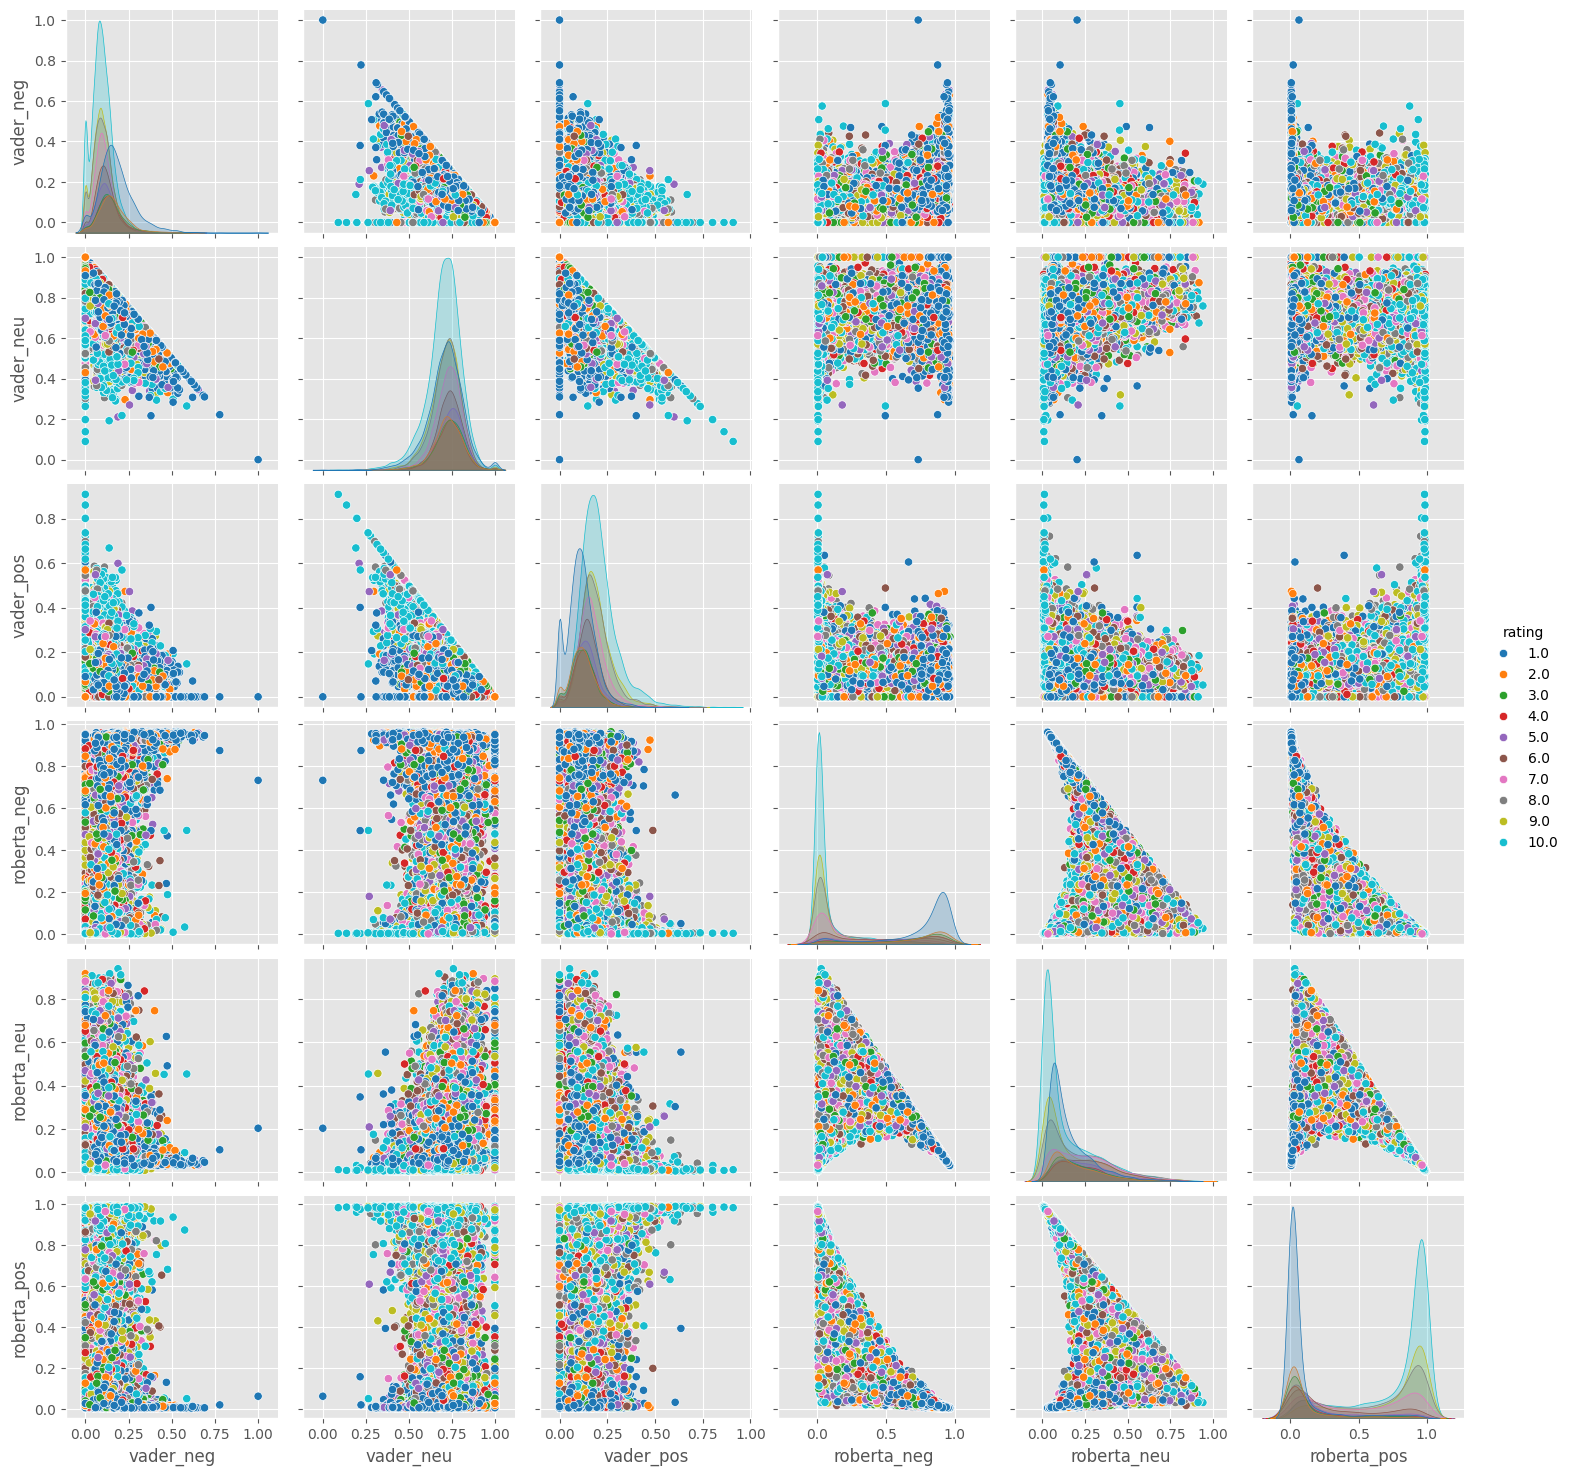

In [ ]:
sns.pairplot(data=StarWars,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

## Klassiffizierung gut/mittel/schlecht

In [ ]:
ausreiser = StarWars[['titel','gesamtbewertung','rating','textblob_polaritaet', 'textblob_subjektivitaet','vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg', 'roberta_neu','roberta_pos','bewertung']]
ausreiser.head(3)

,titel,gesamtbewertung,rating,textblob_polaritaet,textblob_subjektivitaet,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,bewertung
0,Star Wars: Ewoks - Kampf um Endor,5.4,2.0,-0.005000,0.472222,0.092,0.848,0.060,-0.4964,0.613927,0.311481,0.074592,"The title basically sums up everything you need to know about this movie. If low-quality generic fantasy flicks are your guilty pleasure, then you can give it a watch. However, if you're a Star Wars, sci-fi or action movie fans, then you can pretty much forget that this movie exists. There's nothing of value for you here. It's not part of the Star Wars canon (yes, even the expanded universe), the sci-fi elements are almost not present and the action quality is very bad. It's just another project created solely for the purpose of making more money.The only reason why I'm giving it a 2 instead of 1 is because at least this movie is somewhat watchable. But don't expect anything more than that."
1,Star Wars: Ewoks - Kampf um Endor,5.4,7.0,0.065385,0.510256,0.086,0.754,0.161,0.8809,0.025831,0.138740,0.835430,"Somehow I missed this back in my childhood, which is bizarre because I've been a huge sword & sorcery and sci-fi fan for as long as I can remember.I watched this film for the first time today. I thought it was really good. Not perfect, of course, but much better than merely watchable. In fact, I would place this alongside many of the 1980s fantasy greats.If you like films like Labyrinth, Willow, Time Bandits, Dark Crystal, The Princess Bride, etc. Then I'd be shocked if you didn't also like Ewoks: Battle for Endor.It wasn't until I came to IMDB that I discovered that this is actually a sequel to another Ewoks movie that I hadn't heard of, so now my evening viewing is sorted as well!"
2,Star Wars: Ewoks - Kampf um Endor,5.4,5.0,0.148846,0.518043,0.139,0.698,0.163,0.5923,0.676146,0.277843,0.046011,"I'm currently in the process of trying to ""complete Star Wars"".I honestly didn't enjoy it but I'm giving it 5* because it's very clearly a kids film and I'm obviously not the target audience. The Ewok is the only single Star Wars reference in the entire film so it's almost hard to even label this as part of the Star Wars franchise. It's almost as if it's an independent film in its own right (which would have been fine) and they just stuck the Star Wars name on it to boost viewing figures.For a young audience, it's absolutely fine. The little girl who plays the main character is actually really good in her role so props to her.For a 30 year old male however, this is a pretty hard watch."


In [ ]:
def assign_label_textblob(value):
    if value <= -0.67:
        return 'Schlecht'
    elif value <= 1.33:
        return 'Mittel'
    else:
        return 'Gut' 
ausreiser['label_textblob'] = ausreiser['textblob_polaritaet'].apply(assign_label_textblob)

ausreiser.head(3)

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_28592\2285969930.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,titel,gesamtbewertung,rating,textblob_polaritaet,textblob_subjektivitaet,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,bewertung,label_textblob
0,Star Wars: Ewoks - Kampf um Endor,5.4,2.0,-0.005000,0.472222,0.092,0.848,0.060,-0.4964,0.613927,0.311481,0.074592,"The title basically sums up everything you need to know about this movie. If low-quality generic fantasy flicks are your guilty pleasure, then you can give it a watch. However, if you're a Star Wars, sci-fi or action movie fans, then you can pretty much forget that this movie exists. There's nothing of value for you here. It's not part of the Star Wars canon (yes, even the expanded universe), the sci-fi elements are almost not present and the action quality is very bad. It's just another project created solely for the purpose of making more money.The only reason why I'm giving it a 2 instead of 1 is because at least this movie is somewhat watchable. But don't expect anything more than that.",Mittel
1,Star Wars: Ewoks - Kampf um Endor,5.4,7.0,0.065385,0.510256,0.086,0.754,0.161,0.8809,0.025831,0.138740,0.835430,"Somehow I missed this back in my childhood, which is bizarre because I've been a huge sword & sorcery and sci-fi fan for as long as I can remember.I watched this film for the first time today. I thought it was really good. Not perfect, of course, but much better than merely watchable. In fact, I would place this alongside many of the 1980s fantasy greats.If you like films like Labyrinth, Willow, Time Bandits, Dark Crystal, The Princess Bride, etc. Then I'd be shocked if you didn't also like Ewoks: Battle for Endor.It wasn't until I came to IMDB that I discovered that this is actually a sequel to another Ewoks movie that I hadn't heard of, so now my evening viewing is sorted as well!",Mittel
2,Star Wars: Ewoks - Kampf um Endor,5.4,5.0,0.148846,0.518043,0.139,0.698,0.163,0.5923,0.676146,0.277843,0.046011,"I'm currently in the process of trying to ""complete Star Wars"".I honestly didn't enjoy it but I'm giving it 5* because it's very clearly a kids film and I'm obviously not the target audience. The Ewok is the only single Star Wars reference in the entire film so it's almost hard to even label this as part of the Star Wars franchise. It's almost as if it's an independent film in its own right (which would have been fine) and they just stuck the Star Wars name on it to boost viewing figures.For a young audience, it's absolutely fine. The little girl who plays the main character is actually really good in her role so props to her.For a 30 year old male however, this is a pretty hard watch.",Mittel


In [ ]:
ausreiser['label_textblob'].value_counts()

label_textblob
Mittel      28469
Schlecht      129
Name: count, dtype: int64

In [ ]:
mittel = 0
schlecht = 0
gut = 0
for val in ausreiser['rating']:
    if val <= 4:
        schlecht +=1
    elif val <= 7:
        mittel +=1
    else:
        gut += 1

print(f'Labels Rating = Gut: {gut}, mittel: {mittel}, schlecht: {schlecht}')
print(f'Labels Textblob = Gut: 0, mittel: {ausreiser["label_textblob"].value_counts()["Mittel"]}, \
schlecht: {ausreiser["label_textblob"].value_counts()["Schlecht"]}')


Labels Rating = Gut: 13837, mittel: 6413, schlecht: 8348
Labels Textblob = Gut: 0, mittel: 28469, schlecht: 129


In [ ]:
StarWars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28598 entries, 0 to 28597
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   film_id                  28598 non-null  object        
 1   titel                    28598 non-null  object        
 2   jahr                     28598 non-null  object        
 3   kategorie                28598 non-null  object        
 4   review_id                28598 non-null  object        
 5   username                 28598 non-null  object        
 6   gesamtbewertung          28598 non-null  float64       
 7   rating                   28598 non-null  float64       
 8   date                     28598 non-null  datetime64[ns]
 9   review_caption           28598 non-null  object        
 10  bewertung                28598 non-null  object        
 11  textblob_polaritaet      28598 non-null  float64       
 12  textblob_subjektivitaet  28598 n

In [ ]:
StarWars.roberta_neg.describe()

count    28598.000000
mean         0.330102
std          0.354094
min          0.001585
25%          0.012677
50%          0.140254
75%          0.695242
max          0.965664
Name: roberta_neg, dtype: float64

## Klassifizierung pos / negativ

In [ ]:
def pos_neg(value):
    if value < 0.00:
        return 'Negativ'
    else:
        return 'Positiv' 
ausreiser['pos_neg_textblob'] = ausreiser['textblob_polaritaet'].apply(pos_neg)
ausreiser['pos_neg_vader_comp'] = ausreiser['vader_compound'].apply(pos_neg)
ausreiser['pos_neg_textblob'] = ausreiser['textblob_polaritaet'].apply(pos_neg)


ausreiser.head()

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_28592\1700673313.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_28592\1700673313.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ivo_f\AppData\Local\Temp\ipykernel_28592\1700673313.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,titel,gesamtbewertung,rating,textblob_polaritaet,textblob_subjektivitaet,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,bewertung,label_textblob,pos_neg_textblob,pos_neg_vader_comp
0,Star Wars: Ewoks - Kampf um Endor,5.4,2.0,-0.005000,0.472222,0.092,0.848,0.060,-0.4964,0.613927,0.311481,0.074592,"The title basically sums up everything you need to know about this movie. If low-quality generic fantasy flicks are your guilty pleasure, then you can give it a watch. However, if you're a Star Wars, sci-fi or action movie fans, then you can pretty much forget that this movie exists. There's nothing of value for you here. It's not part of the Star Wars canon (yes, even the expanded universe), the sci-fi elements are almost not present and the action quality is very bad. It's just another project created solely for the purpose of making more money.The only reason why I'm giving it a 2 instead of 1 is because at least this movie is somewhat watchable. But don't expect anything more than that.",Mittel,Negativ,Negativ
1,Star Wars: Ewoks - Kampf um Endor,5.4,7.0,0.065385,0.510256,0.086,0.754,0.161,0.8809,0.025831,0.138740,0.835430,"Somehow I missed this back in my childhood, which is bizarre because I've been a huge sword & sorcery and sci-fi fan for as long as I can remember.I watched this film for the first time today. I thought it was really good. Not perfect, of course, but much better than merely watchable. In fact, I would place this alongside many of the 1980s fantasy greats.If you like films like Labyrinth, Willow, Time Bandits, Dark Crystal, The Princess Bride, etc. Then I'd be shocked if you didn't also like Ewoks: Battle for Endor.It wasn't until I came to IMDB that I discovered that this is actually a sequel to another Ewoks movie that I hadn't heard of, so now my evening viewing is sorted as well!",Mittel,Positiv,Positiv
2,Star Wars: Ewoks - Kampf um Endor,5.4,5.0,0.148846,0.518043,0.139,0.698,0.163,0.5923,0.676146,0.277843,0.046011,"I'm currently in the process of trying to ""complete Star Wars"".I honestly didn't enjoy it but I'm giving it 5* because it's very clearly a kids film and I'm obviously not the target audience. The Ewok is the only single Star Wars reference in the entire film so it's almost hard to even label this as part of the Star Wars franchise. It's almost as if it's an independent film in its own right (which would have been fine) and they just stuck the Star Wars name on it to boost viewing figures.For a young audience, it's absolutely fine. The little girl who plays the main character is actually really good in her role so props to her.For a 30 year old male however, this is a pretty hard watch.",Mittel,Positiv,Positiv
3,Star Wars: Ewoks - Kampf um Endor,5.4,5.0,0.123972,0.564444,0.046,0.799,0.156,0.9897,0.569818,0.384397,0.045785,"Ewoks: The Battle For Endor (1985) -Despite the hideous looking Marauder creature King Terak, played by Carel Struycken, this film was definitely made for kids and the focus didn't appear to be on spending a lot of money towards special effects for that purpose. As a result some of them were 'Neville Longbottom On The Broom' bad.Some of the acting was bad too, not the Ewoks obviously, because there was only so much that the actors could do to deliver any performance in miniature bear suits, but the Towani's were pretty ropey.To be fair, Aubree Miller was only about 5 when she played Cindel, but she was as sickly and treacly in this one as she was in the first Ewok film 'Caravan Of Courage' (1984), yet still the better actor of the Towani family.At least Eric Walker's older brother role of Mace was severely reduced to what was basically a cameo, thankfully.And the introduction of Wilford Brimley as Noa added a dimension that was different from the first offering, whilst also creating a different kind of adventure for Cindel and Wicket (Warwick Davis).Yes, it was a very slow film, but certainly the more bearable of the two 'Return Of The Jedi' (

In [ ]:
ausreiser.columns

Index(['titel', 'gesamtbewertung', 'rating', 'textblob_polaritaet',
       'textblob_subjektivitaet', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'bewertung', 'label_textblob', 'pos_neg_textblob',
       'pos_neg_vader_comp'],
      dtype='object')

In [ ]:
#TextBlob
true_pos_textblob = 0
true_neg_textblob = 0
false_pos_textblob = 0
false_neg_textblob = 0

for index, row in ausreiser.iterrows():
    #actual Val = Positiv & predicted = Positiv
    if row['rating'] > 5 and row['pos_neg_textblob'] == 'Positiv':
        true_pos_textblob += 1
    #actual Val = Pos & predicted = negativ
    elif row['rating'] > 5 and row['pos_neg_textblob'] == 'Negativ':
        false_neg_textblob += 1
    #actual val = negativ & predicted = Positiv
    elif row['rating'] <= 4 and row['pos_neg_textblob'] == 'Positiv':
        false_pos_textblob += 1
    else:
    #actual val = negativ & predicted = negativ
        true_neg_textblob += 1

# pos_row = [true_pos_textblob, false_pos_textblob]
# neg_row = [true_neg_textblob, false_neg_textblob]


true_pos_vader_comp = 0
true_neg_vader_comp = 0
false_pos_vader_comp = 0
false_neg_vader_comp = 0

for index, row in ausreiser.iterrows():
    if row['rating'] > 5 and row['pos_neg_vader_comp'] == 'Positiv':
        true_pos_vader_comp += 1
    elif row['rating'] > 5 and row['pos_neg_vader_comp'] == 'Negativ':
        false_neg_vader_comp += 1
    elif row['rating'] <= 4 and row['pos_neg_vader_comp'] == 'Positiv':
        false_pos_vader_comp += 1
    else:
        true_neg_vader_comp += 1


# print(pos_row)
# print(neg_row)
# Confusion MAtrix gesamt
conf_matrix = np.array([[true_pos_textblob, false_pos_textblob, true_pos_vader_comp, false_pos_vader_comp],
                        [false_neg_textblob, true_neg_textblob, false_neg_vader_comp, true_neg_vader_comp]])


conf_matrix_textblob = np.array([[true_pos_textblob, false_pos_textblob],
                        [false_neg_textblob, true_neg_textblob]])

conf_matrix_vader = np.array([[true_pos_vader_comp, false_pos_vader_comp],
                        [ false_neg_vader_comp, true_neg_vader_comp]])

print("Confusion Matrix:")
print(conf_matrix)

print("Confusion Matrix Textblob:")
print(conf_matrix_textblob)

print("Confusion Matrix Vader:")
print(conf_matrix_vader)


Confusion Matrix:
[[17553  4768 14857  3038]
 [ 1037  5240  3733  6970]]
Confusion Matrix Textblob:
[[17553  4768]
 [ 1037  5240]]
Confusion Matrix Vader:
[[14857  3038]
 [ 3733  6970]]


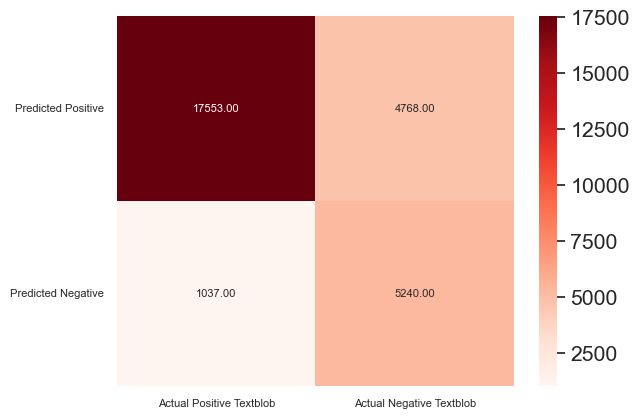

In [ ]:
# Creating a DataFrame from the confusion matrix
df_cm = pd.DataFrame(conf_matrix_textblob, index=['Predicted Positive', 'Predicted Negative'], 
                     columns=['Actual Positive Textblob', 'Actual Negative Textblob'])

# Setting the font scale
sns.set(font_scale=2.4)  # Adjust the font scale as needed

# Plotting the heatmap
heatmap = sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt='.0f', cmap='Reds')

# Adjusting the rotation and font size of the labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)

plt.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Calculate the total number of samples
total_samples = np.sum(conf_matrix_vader)

# Calculate the percentages
percentages = (conf_matrix_vader / total_samples) * 100

# Convert percentages to strings and add '%' symbol
percentages_str = np.around(percentages, decimals=2).astype(str)
percentages_with_percent_sign = np.core.defchararray.add(percentages_str, '%')

# Create a DataFrame from the percentages
df_percentages = pd.DataFrame(percentages_with_percent_sign, 
                              index=['Positive', 'Negative'], 
                              columns=['Positive', 'Negative'])


df_percentages

# # Plot the confusion matrix using Plotly Express
# fig = go.Figure(data=go.Heatmap(z=percentages,
#                                 x=df_percentages.columns,
#                                 y=df_percentages.index,
#                                 colorscale='Reds',  # Red color scale
#                                 zmin=0,  # Minimum value for the color scale
#                                 zmax=100))  # Maximum value for the color scale

# # Add annotations to the heatmap
# for i in range(len(df_percentages.index)):
#     for j in range(len(df_percentages.columns)):
#         fig.add_annotation(text=percentages_with_percent_sign[i, j],
#                            x=df_percentages.columns[j],
#                            y=df_percentages.index[i],
#                            showarrow=False,
#                            font=dict(color='black', size=12),
#                            xref="x",
#                            yref="y")

# # Update layout to set height and width and make the quarters quadratic
# fig.update_layout(title='Confusion Matrix - VADER',
#                   xaxis_title='Actual Label',
#                   yaxis_title='Predicted Label',
#                   height=600,  # Set height of the plot
#                   width=600)   # Set width of the plot

# # Show the plot
# fig.show()


,Positive,Negative
Positive,51.95%,10.62%
Negative,13.05%,24.37%


## Accuracy Textblob & Vader

In [ ]:
#Textblob
print(conf_matrix_textblob)

[[17553  4768]
 [ 1037  5240]]


In [ ]:
sum(sum(conf_matrix_textblob))

28598

In [ ]:
accuracy_textblob = ((conf_matrix_textblob[0][0]+conf_matrix_textblob[1][1]) / sum(sum(conf_matrix_textblob))*100)
recall_textblob = (conf_matrix_textblob[0][0] /(conf_matrix_textblob[0][0]+conf_matrix_textblob[1][0])*100)
precision_textblob = (conf_matrix_textblob[0][0] /(conf_matrix_textblob[0][0]+conf_matrix_textblob[0][1])*100)

accuracy_vader = ((conf_matrix_vader[0][0]+conf_matrix_vader[1][1]) / sum(sum(conf_matrix_vader))*100)
recall_vader = (conf_matrix_vader[0][0] /(conf_matrix_vader[0][0]+conf_matrix_vader[1][0])*100)
precision_vader = (conf_matrix_vader[0][0] /(conf_matrix_vader[0][0]+conf_matrix_vader[0][1])*100)


print(f"Die Accuracy des Textblob Algorithmus beträgt: {accuracy_textblob:.1f}%")
print(f"Der Recall des Textblob Algorithmus beträgt: {recall_textblob:.1f}%")
print(f"Die Precision des Textblob Algorithmus beträgt: {precision_textblob:.1f}%")


print(f"Die Accuracy des Vader Algorithmus beträgt: {accuracy_vader:.1f}%")
print(f"Der Recall des Vader Algorithmus beträgt: {recall_vader:.1f}%")
print(f"Die Precision des Vader Algorithmus beträgt: {precision_vader:.1f}%")

result_table = pd.DataFrame(data = [['Textblob',accuracy_textblob, recall_textblob, precision_textblob], ['Vader',accuracy_vader, recall_vader, precision_vader]], columns=['Methode', 'Accuracy','Precision','Recall'])
result_table[['Accuracy', 'Recall', 'Precision']] = result_table[['Accuracy', 'Recall', 'Precision']].map(lambda x: f"{x:.0f}%")

result_table

Die Accuracy des Textblob Algorithmus beträgt: 79.7%
Der Recall des Textblob Algorithmus beträgt: 94.4%
Die Precision des Textblob Algorithmus beträgt: 78.6%
Die Accuracy des Vader Algorithmus beträgt: 76.3%
Der Recall des Vader Algorithmus beträgt: 79.9%
Die Precision des Vader Algorithmus beträgt: 83.0%


,Methode,Accuracy,Precision,Recall
0,Textblob,80%,94%,79%
1,Vader,76%,80%,83%


## ROC-Kurve

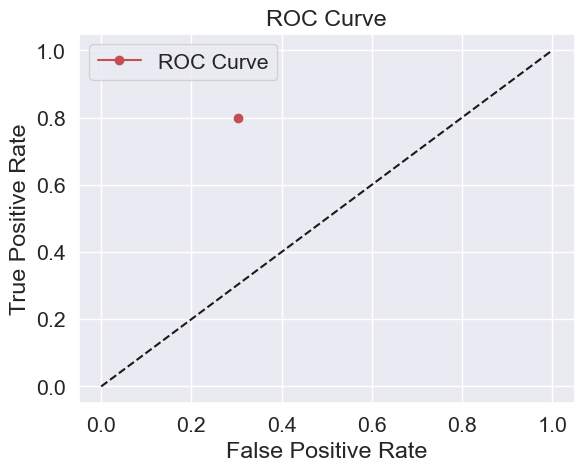

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = np.array([[51.95, 10.62], [13.05, 24.37]])

# Umwandlung der Prozentsätze in absolute Werte
TP = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[1, 1]

# Berechnung von True Positive Rate (TPR) und False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, marker='o', color='r', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Differenz Gesamtbewertung und zu berücksichtigende Bewertung in Sentiment Analyse

In [ ]:
StarWars.groupby('titel')['gesamtbewertung'].value_counts()

titel                                                 gesamtbewertung
Solo: A Star Wars Story                               6.9                2136
Star Wars Rebels                                      8.1                 165
Star Wars: Clone Wars                                 7.8                  51
Star Wars: Episode I - Die dunkle Bedrohung           6.5                2783
Star Wars: Episode II - Angriff der Klonkrieger       6.6                2545
Star Wars: Episode III - Die Rache der Sith           7.6                2206
Star Wars: Episode IV - Krieg der Sterne              8.6                1564
Star Wars: Episode IX - Der Aufstieg Skywalkers       6.4                6064
Star Wars: Episode V - Das Imperium schlägt zurück    8.7                 995
Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter  8.3                 618
Star Wars: Episode VII - Das Erwachen der Macht       7.8                2449
Star Wars: Episode VIII - Die letzten Jedi            6.9               

In [ ]:
df_rating_roberta_pos = StarWars.query("rating == 1 & roberta_pos >= 0.9").sort_values("roberta_pos", ascending=False)
len(df_rating_roberta_pos)

44

In [ ]:
StarWars.titel.unique()

array(['Star Wars: Ewoks - Kampf um Endor', 'Star Wars: Rogue One',
       'Solo: A Star Wars Story', 'Star Wars: Clone Wars',
       'Star Wars: Episode I - Die dunkle Bedrohung',
       'Star Wars: Episode II - Angriff der Klonkrieger',
       'Star Wars: Episode III - Die Rache der Sith',
       'Star Wars: Episode IV - Krieg der Sterne',
       'Star Wars: Episode IX - Der Aufstieg Skywalkers',
       'Star Wars: Episode V - Das Imperium schlägt zurück',
       'Star Wars: Episode VI - Die Rückkehr der Jedi-Ritter',
       'Star Wars: Episode VII - Das Erwachen der Macht',
       'Star Wars: Episode VIII - Die letzten Jedi', 'Star Wars Rebels',
       'Star Wars: Resistance', 'Star Wars: The Bad Batch',
       'Star Wars: The Clone Wars', 'Star Wars: Visions',
       'Star Wars: Geschichten der Jedi',
       'Star Wars: Ewoks - Karawane der Tapferen',
       'The Star Wars Holiday Special'], dtype=object)

## Unterschied Durschnitt Rating Film & Gesamtbewertung aus IMDB (aufgrund fehlenden Rezessionen mit Wortlauten)

In [119]:
df_gesamtbewertung = pd.DataFrame(StarWars.groupby('titel')['rating'].mean())
df_gesamtbewertung
df_gesamtbewertung_titel = StarWars[['film_id','jahr','titel','gesamtbewertung']].drop_duplicates()
df_gesamtbewertung = df_gesamtbewertung.merge(df_gesamtbewertung_titel, on='titel', how='inner')
df_gesamtbewertung['rating_gesamtbewertung'] = df_gesamtbewertung['rating'] - df_gesamtbewertung['gesamtbewertung']
df_gesamtbewertung.drop_duplicates(['titel'], inplace=True)
df_gesamtbewertung = df_gesamtbewertung.sort_values('jahr', ascending=False)
df_gesamtbewertung


,titel,rating,film_id,jahr,gesamtbewertung,rating_gesamtbewertung
14,Star Wars: Geschichten der Jedi,8.685393,tt20723374,2022,8.2,0.485393
20,Star Wars: Visions,5.947644,tt13622982,2021,7.0,-1.052356
17,Star Wars: The Bad Batch,6.800000,tt12708542,2021,7.8,-1.000000
7,Star Wars: Episode IX - Der Aufstieg Skywalkers,5.944756,tt2527338,2019,6.4,-0.455244
0,Solo: A Star Wars Story,7.187266,tt3778644,2018,6.9,0.287266
15,Star Wars: Resistance,4.449102,tt8336340,2018,5.3,-0.850898
11,Star Wars: Episode VIII - Die letzten Jedi,4.108159,tt2527336,2017,6.9,-2.791841
16,Star Wars: Rogue One,7.370518,tt3748528,2016,7.8,-0.429482
10,Star Wars: Episode VII - Das Erwachen der Macht,6.133524,tt2488496,2015,7.8,-1.666476
1,Star Wars Rebels,6.872727,tt2930604,2014,8.1,-1.227273


In [ ]:
fig = px.bar(df_gesamtbewertung, x='titel', y=['rating', 'gesamtbewertung'], barmode='group')
fig.update_layout(
    xaxis_title='Filmtitel',
    yaxis_title='Rating',
    legend_title='Legende',
    title='Differenz Bewertungen',
    barmode='group',
    plot_bgcolor='rgba(0,0,0,0)',
    title_x=0.5,
    font=dict(
        size=14
    )
)

fig.update_traces(
    name='Rating',
    selector=dict(type='bar', name='rating')  # Update the name for the 'rating' trace
)
fig.update_traces(
    name='Gesamtbewertung',
    selector=dict(type='bar', name='gesamtbewertung')  # Update the name for the 'gesamtbewertung' trace
)
dark_red_colors = ['#4A1000', '#8E2000']
for i, trace in enumerate(fig.data):
    trace.marker.color = dark_red_colors[i]

fig.show()

#https://plotly.com/python/plotly-express/#gallery nach px.ecdf suchen

Confusion matrix, without normalization
[[3 0 0]
 [0 2 1]
 [0 2 1]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.66666667 0.33333333]]


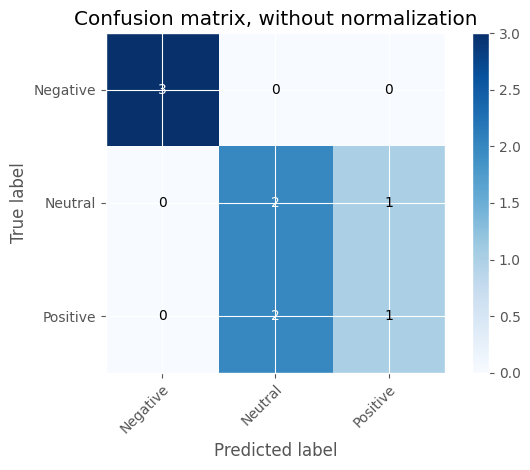

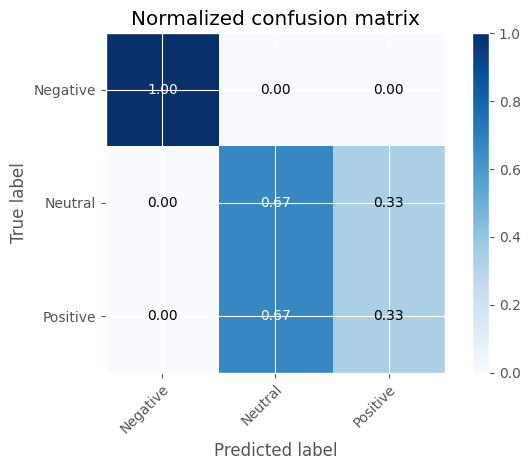

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = metrics.confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Example usage:
y_test = np.array([0, 1, 2, 0, 2, 1, 0, 1, 2])
y_pred = np.array([0, 2, 1, 0, 2, 1, 0, 1, 1])
classes = ['Negative', 'Neutral', 'Positive']

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()